In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



In [25]:
df = pd.read_csv('ex2data1.txt', header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
df.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [26]:
print("\nShape:", df.shape)
print("\nTarget balance (0 = not admitted, 1 = admitted):")
print(df['Admitted'].value_counts())


Shape: (100, 3)

Target balance (0 = not admitted, 1 = admitted):
Admitted
1    60
0    40
Name: count, dtype: int64


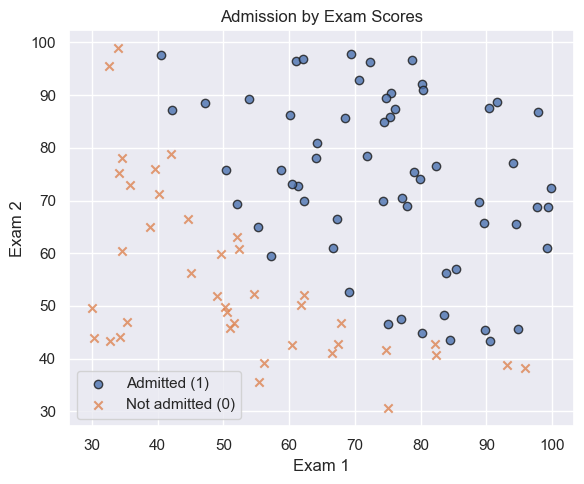

In [27]:
plt.figure(figsize=(6,5))
admit_1 = df[df['Admitted']==1]
admit_0 = df[df['Admitted']==0]

plt.scatter(admit_1['Exam 1'], admit_1['Exam 2'], label='Admitted (1)', marker='o', edgecolor='k', alpha=0.8)
plt.scatter(admit_0['Exam 1'], admit_0['Exam 2'], label='Not admitted (0)', marker='x', alpha=0.8)

plt.xlabel('Exam 1')
plt.ylabel('Exam 2')
plt.title('Admission by Exam Scores')
plt.legend()
plt.tight_layout()
plt.show()


In [28]:
X = df[['Exam 1', 'Exam 2']].values
y = df['Admitted'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc  = scaler.transform(X_test)

In [29]:
log_clf = LogisticRegression(max_iter=1000, random_state=42)
log_clf.fit(X_train_sc, y_train)

y_pred = log_clf.predict(X_test_sc)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {acc:.3f}")


Accuracy on test set: 0.950


In [30]:
intercept = float(log_clf.intercept_[0])
coef_vec  = log_clf.coef_[0]

print(f"Intercept (bias): {intercept:.6f}")
print("Coefficients:")
print(pd.Series(coef_vec, index=['Exam 1','Exam 2']))

Intercept (bias): 0.929790
Coefficients:
Exam 1    2.129992
Exam 2    1.883686
dtype: float64
